<a href="https://colab.research.google.com/github/Amey2510/Test-Repo/blob/main/Text_Classification_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
path=r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Restaurant_Reviews.tsv'
df = pd.read_csv(path,sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [2]:
import re
def pre_process(text):
  text = text.lower()
  pattern = r'[^a-z ]'
  new = re.sub(pattern,'',text)
  return new


In [3]:
df['pre_review'] = df['Review'].apply(pre_process)
df.head()

,Review,Liked,pre_review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [4]:
x = df['pre_review']
y = df['Liked']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_pre = tfidf.fit_transform(x).toarray()
x_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
x_pre.shape

(1000, 2046)

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,train_size=0.8,random_state=21)

In [8]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout,BatchNormalization

In [9]:
model = Sequential()

# Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Hidden Layer 1
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))

# Hidden Layer 2
model.add(Dense(units=32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

# Output Layer
model.add(Dense(units=1,activation='sigmoid'))

In [10]:
from keras.callbacks import EarlyStopping

In [11]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
nn = model.fit(xtrain,ytrain,validation_split=0.4,epochs=100,callbacks=[es])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4537 - loss: 0.9535 - val_accuracy: 0.5969 - val_loss: 0.6905
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6903 - loss: 0.5874 - val_accuracy: 0.5312 - val_loss: 0.6887
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8118 - loss: 0.4098 - val_accuracy: 0.4906 - val_loss: 0.6866
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8832 - loss: 0.3363 - val_accuracy: 0.4969 - val_loss: 0.6842
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9227 - loss: 0.2548 - val_accuracy: 0.4906 - val_loss: 0.6810
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9372 - loss: 0.1941 - val_accuracy: 0.5063 - val_loss: 0.6760
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9658 - loss: 0.1891 - val_accuracy: 0.5156 - val_loss: 0.6713
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9759 - loss: 0.1353 - val_accuracy: 0.

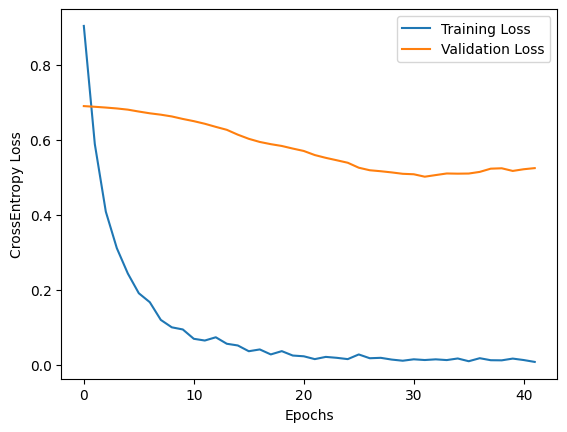

In [14]:
## Learning Curve
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('CrossEntropy Loss')
plt.legend()
plt.show()

In [15]:
def predict(text):
  t1 = pre_process(text)
  newt1 = tfidf.transform([t1])
  probs = model.predict(newt1)
  if probs>0.5:
    return 'Positive'
  else:
    return 'Negative'



In [16]:
review = "Food tasted great. WIll visit agAIN..!!"
print(predict(review))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Positive
